# Mobile Phone Market Analysis 2025: A Deep Dive into Features, Brands, and Pricing

## 1. Introduction

In today's hyperconnected world, smartphones have become an essential part of consumer life. The global mobile phone market continues to evolve rapidly with new technologies, features, and price points emerging every year. This analysis explores a comprehensive dataset of mobile phones from various markets including Pakistan, India, China, USA, and Dubai.

This exploratory data analysis aims to uncover key insights about:
- What specifications drive pricing across different markets?
- How do brands position themselves in terms of features and price points?
- What are the relationships between key specifications (RAM, camera quality, battery, etc.)?
- How have mobile phone features evolved over the recent years?

The dataset contains information on 930 mobile phones with details on their specifications and pricing across different markets.

## 2. Data Overview and Initial Exploration

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import sys
import re
import plotly.express as px 
import plotly.graph_objects as go

In [35]:
# Loading the dataset 
df = pd.read_csv(r'C:\Users\Rahul\Desktop\DSA\Data_Science\EDA-Portfolio\data\Mobiles Dataset (2025).csv', encoding='ISO-8859-1')
df.shape

(930, 15)

In [36]:
# Dataset Overview
df.columns.tolist()

['Company Name',
 'Model Name',
 'Mobile Weight',
 'RAM',
 'Front Camera',
 'Back Camera',
 'Processor',
 'Battery Capacity',
 'Screen Size',
 'Launched Price (Pakistan)',
 'Launched Price (India)',
 'Launched Price (China)',
 'Launched Price (USA)',
 'Launched Price (Dubai)',
 'Launched Year']

In [37]:
# Understanding the Dataset
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [38]:
df.describe()
# Shows that only Launched Year is Integer rest all are Object type

,Launched Year
count,930.000000
mean,2022.193548
std,1.862080
min,2014.000000
25%,2021.000000
50%,2023.000000
75%,2024.000000
max,2025.000000


In [39]:
# Checking for Null Values / Missing Values
df.isnull().sum()
# Clearly Shows that there are no missing value in the dataset

Company Name                 0
Model Name                   0
Mobile Weight                0
RAM                          0
Front Camera                 0
Back Camera                  0
Processor                    0
Battery Capacity             0
Screen Size                  0
Launched Price (Pakistan)    0
Launched Price (India)       0
Launched Price (China)       0
Launched Price (USA)         0
Launched Price (Dubai)       0
Launched Year                0
dtype: int64

In [40]:
# Checking for Duplicate Values
df.duplicated().sum()


15

## 3. Data Cleaning and Preprocessing

In [41]:
df1 = df.copy()
df1.head(5)
# Here we can see that Mobile Weight is 174g and thus that object can be converted to numeric
# Ram is also an object and can be converted to numeric
# Front Camera and Back Camera are also objects and can be converted to numeric
# Battery Capacity is also an object and can be converted to numeric
# Price is also an object and can be converted to numeric

# Total of 11 Columns in the dataset

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [42]:
# 1. Mobile Weight
# We can define a function to convert the weight from string to numeric

def convert_weight(weight):
    if isinstance(weight, float):  # If already a float, return as is
        return weight
    if 'g' in weight:
        return float(weight.replace('g', '').strip())
    elif 'kg' in weight:
        return float(weight.replace('kg', '').strip()) * 1000
    else:
        return np.nan
    
df1['Mobile Weight'] = df1['Mobile Weight'].apply(convert_weight)
df1['Mobile Weight'].dtype
# Now the Mobile Weight is converted to numeric
df1['Mobile Weight'].head()

0    174.0
1    174.0
2    174.0
3    203.0
4    203.0
Name: Mobile Weight, dtype: float64

In [43]:
# 2. Ram
# We can define a function to convert the ram from string to numeric
df1['RAM'].unique()
def convert_ram(ram):
    if isinstance(ram, float): 
        return ram
    try:
        if '/' in ram:  
            ram = ram.split('/')[0].strip() 
        if 'GB' in ram:
            return float(ram.replace('GB', '').strip())
        elif 'MB' in ram:
            return float(ram.replace('MB', '').strip()) / 1024
        else:
            return np.nan
    except ValueError:
        return np.nan
df1['RAM'] = df1['RAM'].apply(convert_ram)
df1['RAM'].dtype
# Now the RAM is converted to numeric
df1['RAM'].head()


0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: RAM, dtype: float64

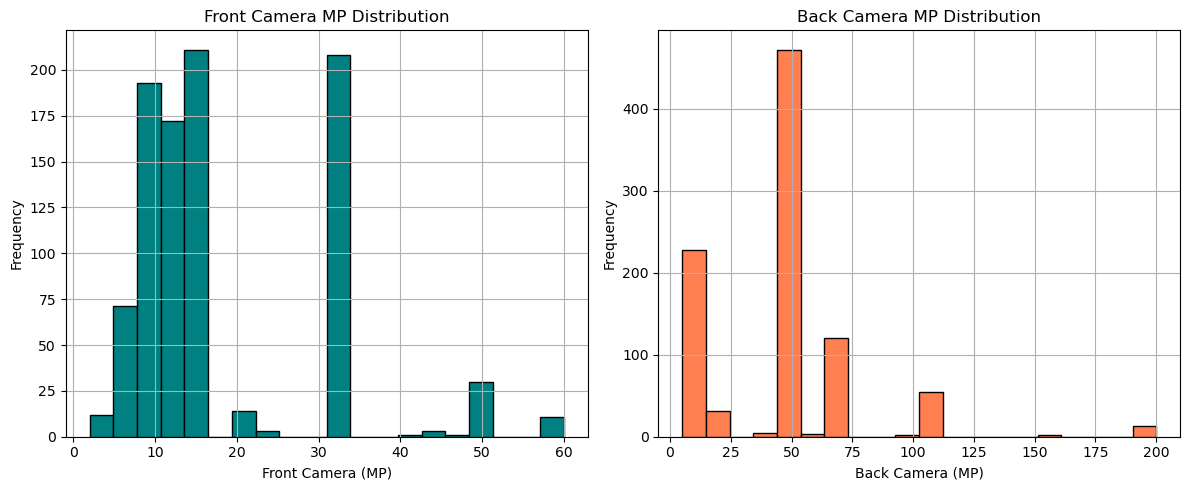

[12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 12.0,
 12.0,
 12.0,
 12.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 12.0,
 12.0,
 10.0,
 10.0,
 10.0,
 10.0,
 32.0,
 32.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 5.0,
 5.0,
 32.0,
 32.0,
 13.0,
 13.0,
 13.0,
 13.0,
 5.0,
 5.0,
 32.0,
 32.0,
 13.0,
 13.0,
 13.0,
 13.0,

In [44]:
import re
import numpy as np

def convert_camera(camera):
    if isinstance(camera, float) or isinstance(camera, int): 
        return camera
    try:
        # Find all occurrences of numbers followed by 'MP'
        mp_values = re.findall(r'(\d+\.?\d*)\s*MP', camera.upper())
        if mp_values:
            # Convert to float and return the max MP found
            return max([float(mp) for mp in mp_values])
        else:
            return np.nan
    except:
        return np.nan

# Apply it to both columns
df1['Front Camera'] = df1['Front Camera'].apply(convert_camera)
df1['Back Camera'] = df1['Back Camera'].apply(convert_camera)

df1['Front Camera'].dtype
df1['Back Camera'].dtype

# Now the Front Camera and Back Camera are converted to numeric

df1['Front Camera'].unique()
import re
import numpy as np

def convert_camera(camera):
    if isinstance(camera, float) or isinstance(camera, int): 
        return camera
    try:
        # Find all occurrences of numbers followed by 'MP'
        mp_values = re.findall(r'(\d+\.?\d*)\s*MP', camera.upper())
        if mp_values:
            # Convert to float and return the max MP found
            return max([float(mp) for mp in mp_values])
        else:
            return np.nan
    except:
        return np.nan

# Apply it to both columns
df1['Front Camera'] = df1['Front Camera'].apply(convert_camera)
df1['Back Camera'] = df1['Back Camera'].apply(convert_camera)

# PLotting the Front Camera and Back Camera
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
df1['Front Camera'].hist(bins=20, color='teal', edgecolor='black')
plt.title('Front Camera MP Distribution')
plt.xlabel('Front Camera (MP)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df1['Back Camera'].hist(bins=20, color='coral', edgecolor='black')
plt.title('Back Camera MP Distribution')
plt.xlabel('Back Camera (MP)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


df1['Back Camera'].tolist()
df1['Front Camera'].tolist()

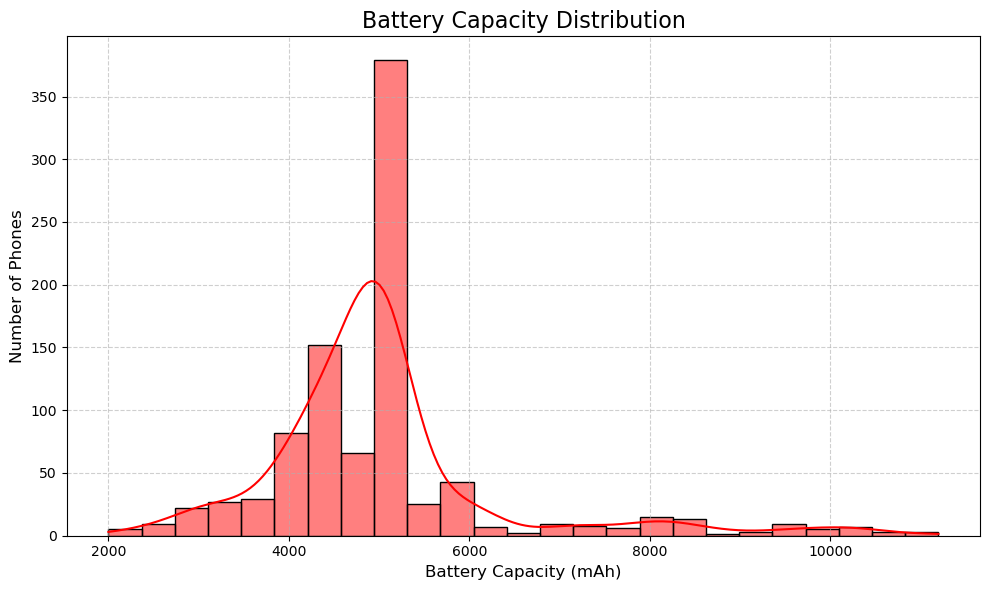

count      930.000000
mean      5026.163441
std       1355.548264
min       2000.000000
25%       4402.500000
50%       5000.000000
75%       5091.250000
max      11200.000000
Name: Battery Capacity, dtype: float64

In [65]:
# We will COnvert the Battery Capacity to numeric

def convert_battery(battery):
    if isinstance(battery, float):
        return battery
    try:
        battery = battery.replace(',', '').replace('"', '').strip().lower()
        if 'mah' in battery:
            return float(battery.replace('mah', '').strip())
        elif 'ah' in battery:
            return float(battery.replace('ah', '').strip()) * 1000
        else:
            return np.nan
    except ValueError:
        return np.nan

df1['Battery Capacity'] = df1['Battery Capacity'].apply(convert_battery)
df1['Battery Capacity'].dtype

# Now the Battery Capacity is converted to numeric
df1['Battery Capacity'].unique()

# Droping missing values for visualization
battery_data = df1['Battery Capacity'].dropna()

# Plotting a Histogram
plt.figure(figsize=(10, 6))
sns.histplot(battery_data, bins=25, kde=True, color='red', edgecolor='black')

plt.title('Battery Capacity Distribution', fontsize=16)
plt.xlabel('Battery Capacity (mAh)', fontsize=12)
plt.ylabel('Number of Phones', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

df1['Battery Capacity'].describe()

In [46]:
# WE will convert the price to numeric
def convert_price(price):
    if isinstance(price, (float, int)):
        return price

    if not isinstance(price, str):
        return np.nan
    
    try:
        cleaned_price = re.sub(r'[^\d.]', '', price.replace(',', ''))
        return float(cleaned_price) if cleaned_price else np.nan
    except:
        return np.nan

countries = ['Launched Price (Pakistan)', 'Launched Price (India)', 
        'Launched Price (Dubai)', 'Launched Price (USA)', 
        'Launched Price (China)']

for country in countries:
    df1[country] = df1[country].apply(convert_price)

df1['Launched Price (Pakistan)'].unique()

# Conversion rates to INR
conversion_rates = {
    'Launched Price (Pakistan)': 0.31,  
    'Launched Price (India)': 1,        
    'Launched Price (Dubai)': 22,       
    'Launched Price (USA)': 86,         
    'Launched Price (China)': 11        
}

# Apply conversion to INR for each price column
for country in countries:
    df1[country] = df1[country] * conversion_rates[country]
    df1[country] = df1[country].round(2)

df1['Launched Price (Pakistan)'].unique()
df1['Launched Price (India)'].unique()
df1['Launched Price (Dubai)'].unique()
df1['Launched Price (USA)'].unique()
df1['Launched Price (China)'].unique()

array([ 63789.,  67089.,  71489.,  68189.,  76989.,  78089.,  82489.,
        85789.,  90189.,  58289.,  61589.,  65989.,  62689.,  74789.,
        80289.,  87989.,  95689.,  57189.,  60489.,  64889.,  69289.,
        79189.,  89089.,  93489.,  98989.,  84689.,  91289.,  96789.,
       101189.,  92389.,  81389.,  92268.,  96668., 101068., 107668.,
       114268., 110968., 117568., 124168.,  36289.,  40689.,  25289.,
        29689.,  38489.,  41789.,  70389., 107789., 114389., 123189.,
        72589., 131989., 142989., 120989.,  24189.,  27489.,  19789.,
        21989.,  17589.,  16489.,  18689.,  13189.,  15389.,  23089.,
        12089.,  14289.,  26389.,  10989.,  34089.,  20889., 109989.,
       104489.,  47289.,  32989.,   9889.,   8789.,  54989.,  30789.,
        51689.,  46189.,  35189.,  42889.,  43989.,  49489.,  50589.,
        39589.,  37389.,  37400.,  39600.,  30800.,  31900.,  33000.,
        29700.,  28600.,  26400.,  27500.,  22000.,  23100.,  19800.,
        20900.,  165

In [47]:
# We Will extract Company Name from the Mobile Name
df1['Company'] = df1['Company Name'].str.split(' ').str[0]
df1['Company'].unique()

array(['Apple', 'Samsung', 'OnePlus', 'Vivo', 'iQOO', 'Oppo', 'Realme',
       'Xiaomi', 'Lenovo', 'Motorola', 'Huawei', 'Nokia', 'Sony',
       'Google', 'Tecno', 'Infinix', 'Honor', 'POCO', 'Poco'],
      dtype=object)

In [48]:
df1.describe()

,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
count,930.000000,930.000000,930.000000,930.000000,930.000000,929.000000,930.000000,930.000000,9.300000e+02,930.000000,930.000000
mean,228.267097,7.784946,18.163011,46.854624,5026.163441,38885.179688,50576.818280,42035.731183,5.379436e+04,48046.533333,2022.193548
std,105.432503,3.179673,11.986228,31.068100,1355.548264,31493.991997,40960.179361,30426.843207,1.158903e+05,34443.896113,1.862080
min,135.000000,1.000000,2.000000,5.000000,2000.000000,4959.690000,5999.000000,5489.000000,6.794000e+03,6578.000000,2014.000000
25%,185.000000,6.000000,8.000000,16.000000,4402.500000,17049.690000,19999.000000,18691.750000,2.150000e+04,22000.000000,2021.000000
50%,194.000000,8.000000,16.000000,50.000000,5000.000000,26350.000000,34999.000000,30800.000000,3.861400e+04,36850.000000,2023.000000
75%,208.000000,8.000000,32.000000,50.000000,5091.250000,55799.690000,74900.000000,60489.000000,7.301400e+04,70378.000000,2024.000000
max,732.000000,16.000000,60.000000,200.000000,11200.000000,187549.690000,274999.000000,197989.000000,3.407492e+06,244178.000000,2025.000000


### 4.1 Price Distribution Analysis

In [49]:
# Creating a function to plot the price distribution of different countries
def plot_price_distribution(df, price, title):
    plt.figure(figsize=(12, 6))
    
    # Plotting a histogram
    sns.histplot(df[price].dropna(), bins=40, kde=True)
    quartiles = df[price].dropna().quantile([0.25, 0.5, 0.75]).values
    labels = ['25th percentile', 'Median', '75th percentile']
    colors = ['green', 'red', 'orange']
    for q, label, color in zip(quartiles, labels, colors):
        plt.axvline(x=q, color=color, linestyle='--', label=f'{label}: {q:.2f}')
    
    plt.title(title, fontsize=15)
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
# Plotting the price distribution for different countries
    df[price].describe()

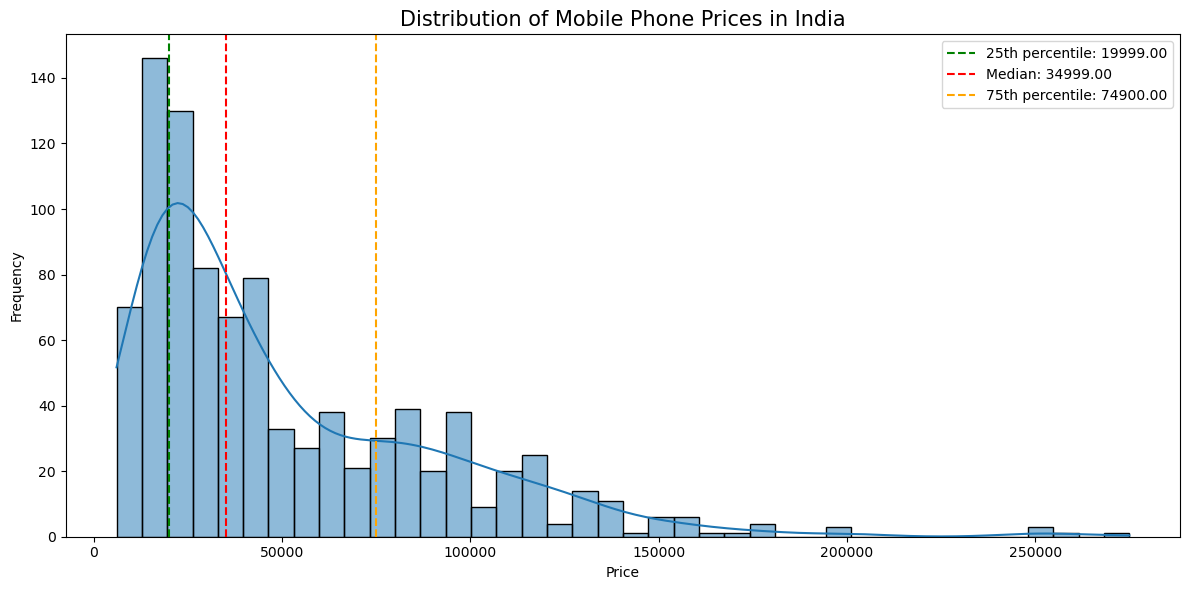

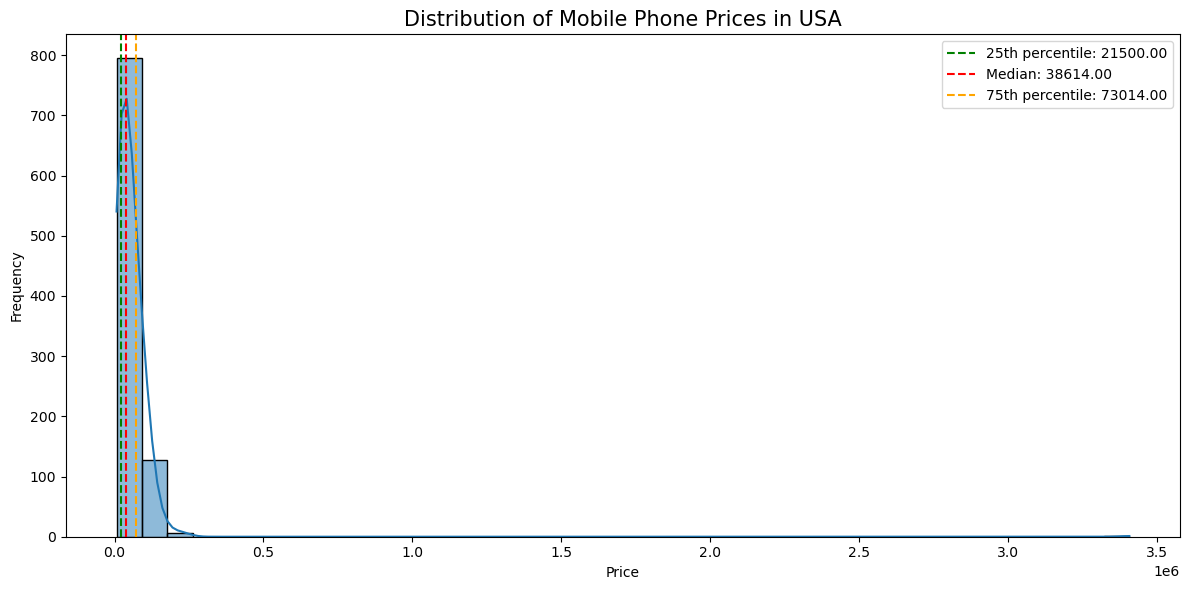

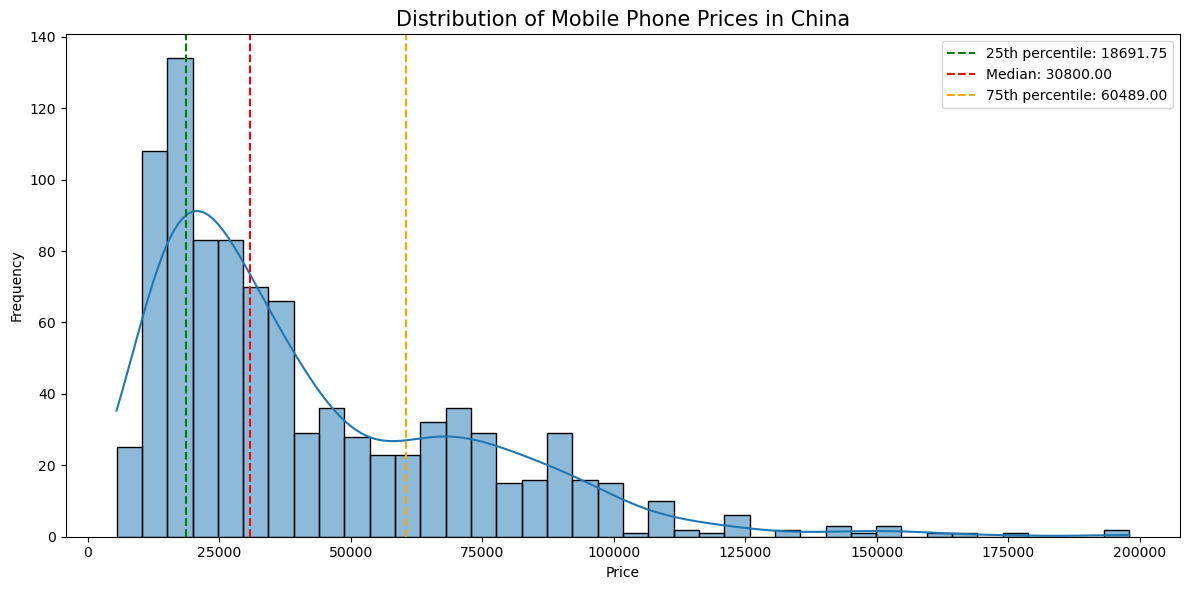

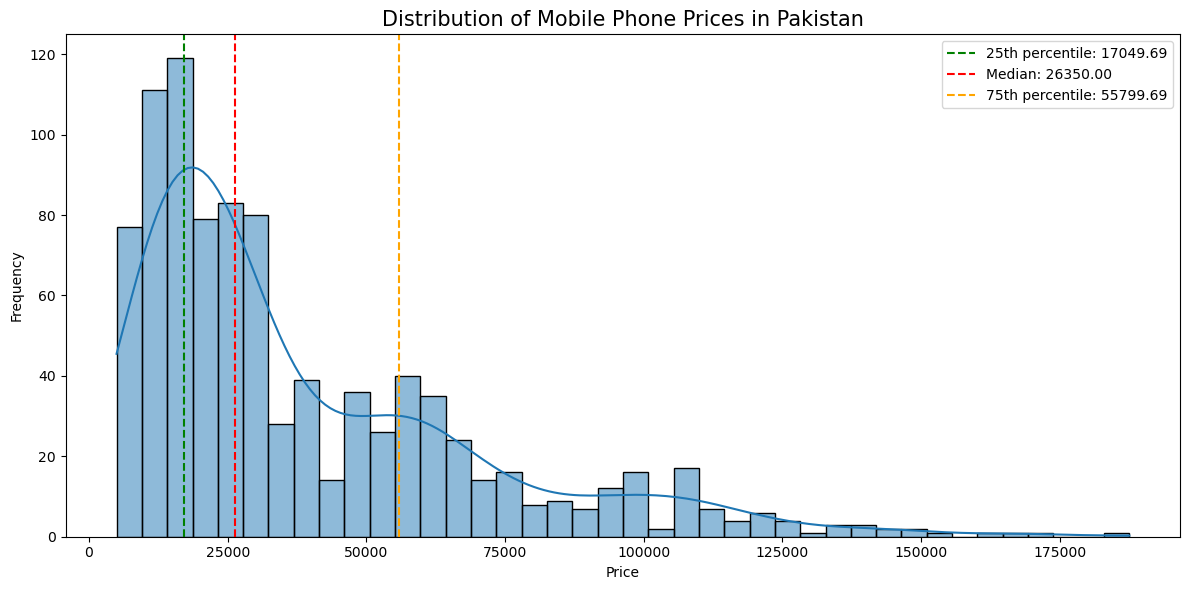

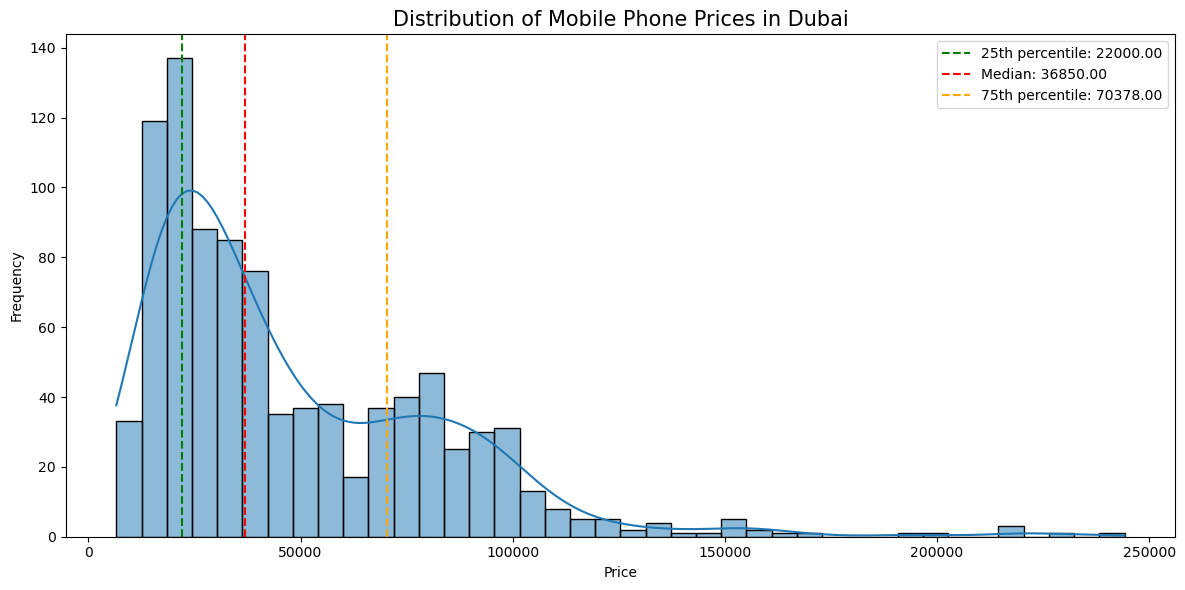

In [50]:
# Plot price distributions for different markets
plot_price_distribution(df1, 'Launched Price (India)', 'Distribution of Mobile Phone Prices in India')
plot_price_distribution(df1, 'Launched Price (USA)', 'Distribution of Mobile Phone Prices in USA')
plot_price_distribution(df1, 'Launched Price (China)', 'Distribution of Mobile Phone Prices in China')
plot_price_distribution(df1, 'Launched Price (Pakistan)', 'Distribution of Mobile Phone Prices in Pakistan')
plot_price_distribution(df1, 'Launched Price (Dubai)', 'Distribution of Mobile Phone Prices in Dubai')


### 4.2 Brand Distribution

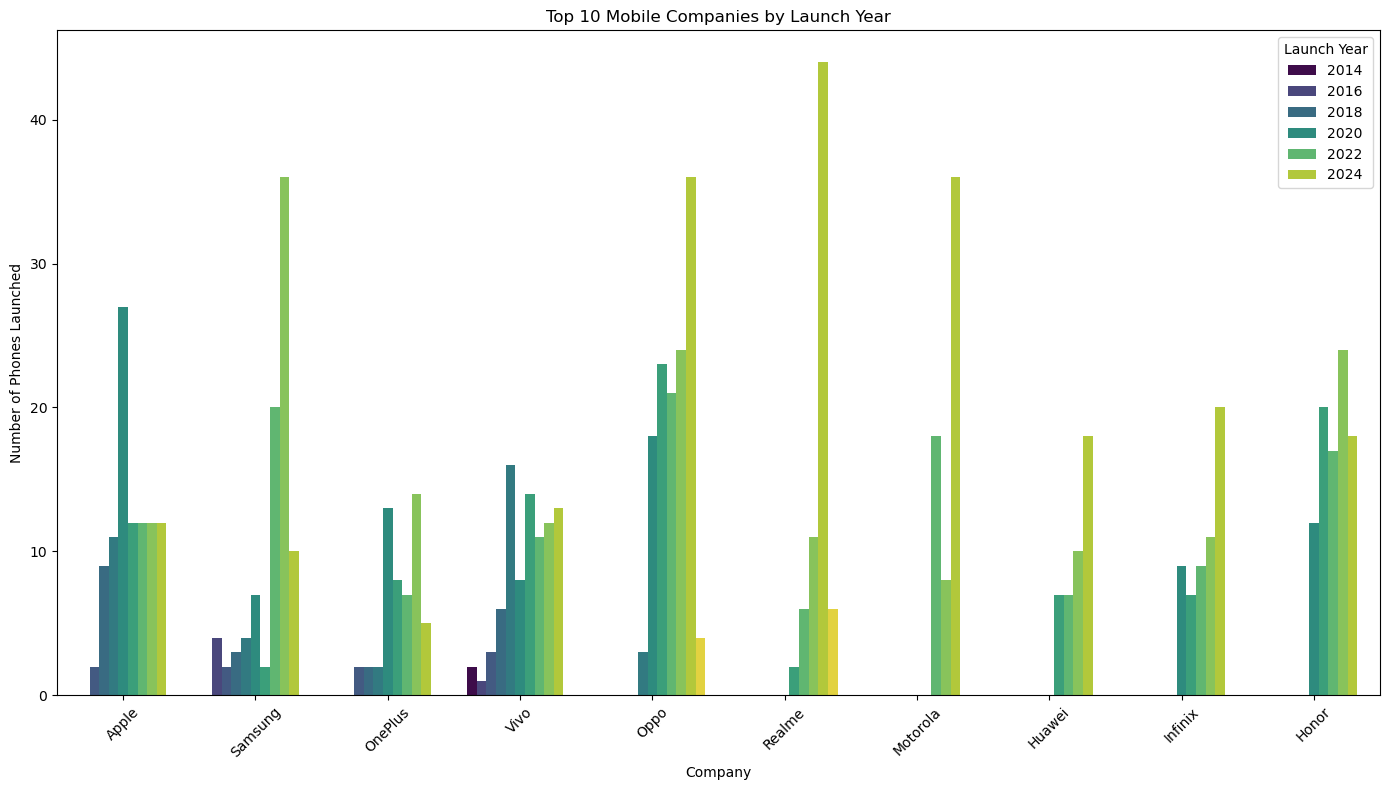

In [51]:
# Plotting the Price Distribution for Different Companies

plt.figure(figsize=(14, 8))
top_companies = df1['Company'].value_counts().nlargest(10).index
sns.countplot(data=df1[df1['Company'].isin(top_companies)], x='Company', hue='Launched Year', palette='viridis')
plt.title('Top 10 Mobile Companies by Launch Year')
plt.xlabel('Company')
plt.ylabel('Number of Phones Launched')
plt.xticks(rotation=45)
plt.legend(title='Launch Year')
plt.tight_layout()
plt.show()


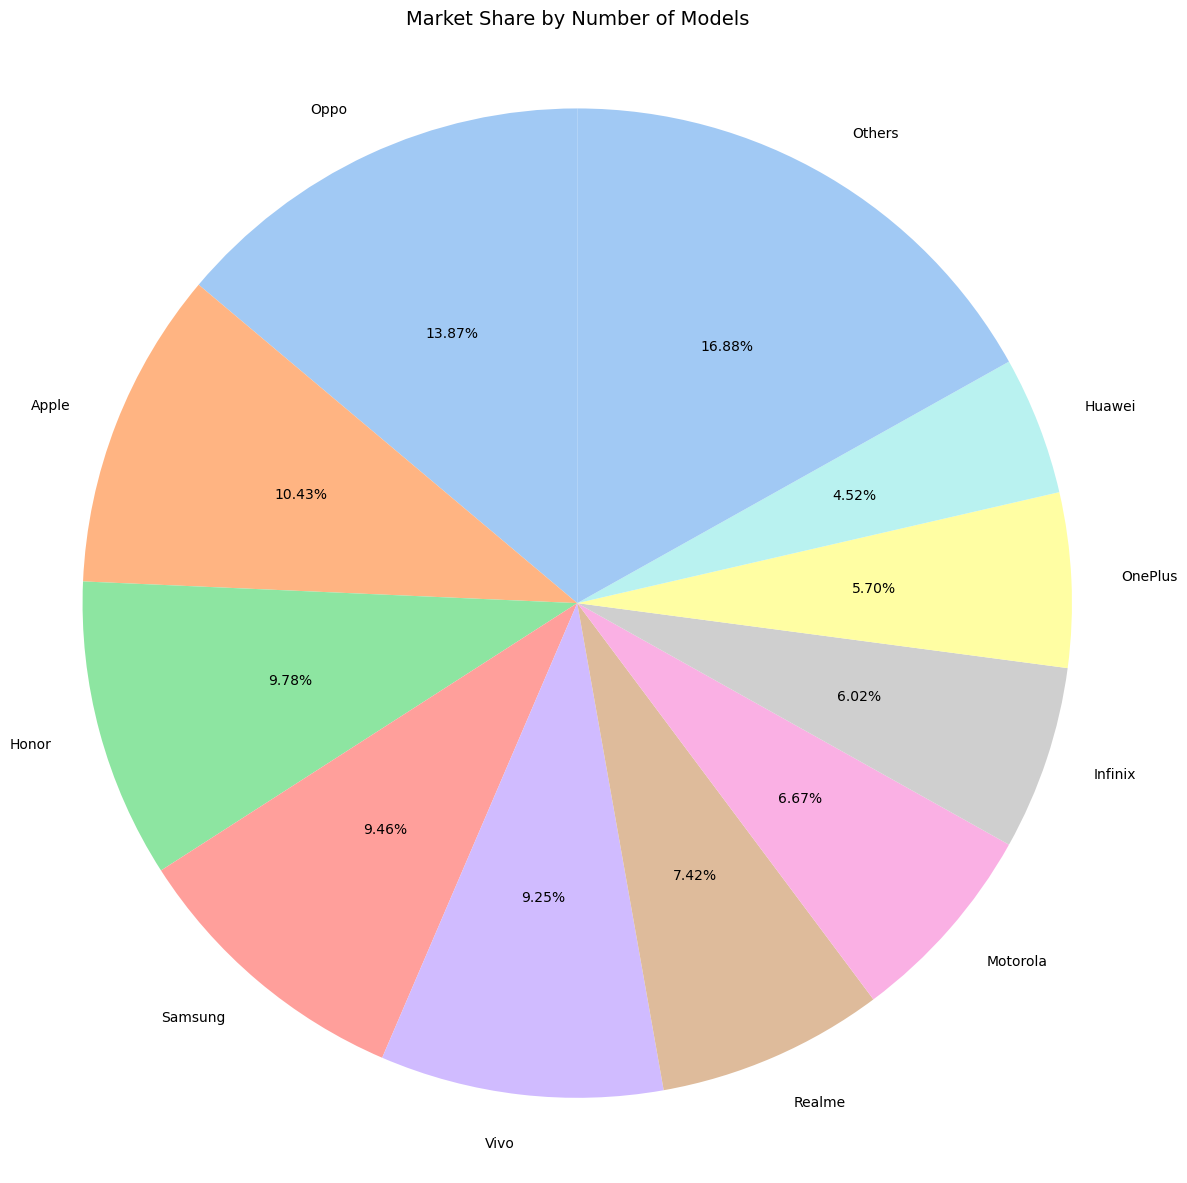

In [52]:
# Creating a Pie Chart to understand the market share of different companies
plt.figure(figsize=(12, 12))
company = df1['Company'].value_counts()
company_plot = company[top_companies].copy()
company_plot['Others'] = company.drop(top_companies).sum()


plt.pie(company_plot, labels=company_plot.index, autopct='%1.2f%%',
        startangle=90, shadow=False, colors=sns.color_palette('pastel', len(company_plot)))

plt.title('Market Share by Number of Models', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

### 4.3 Specifications Distribution

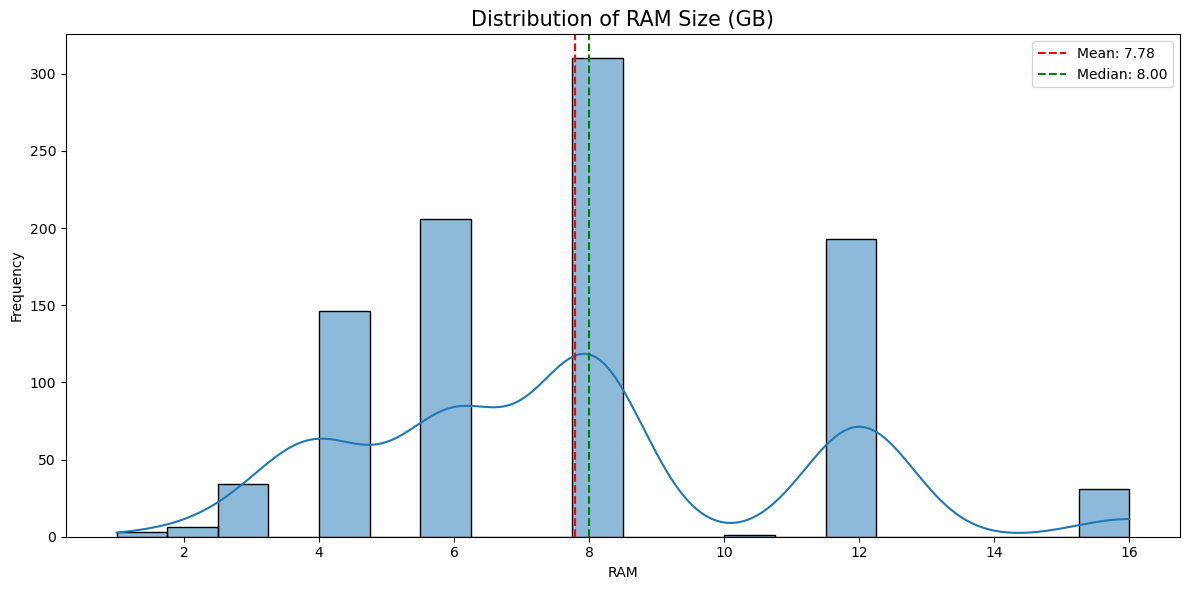

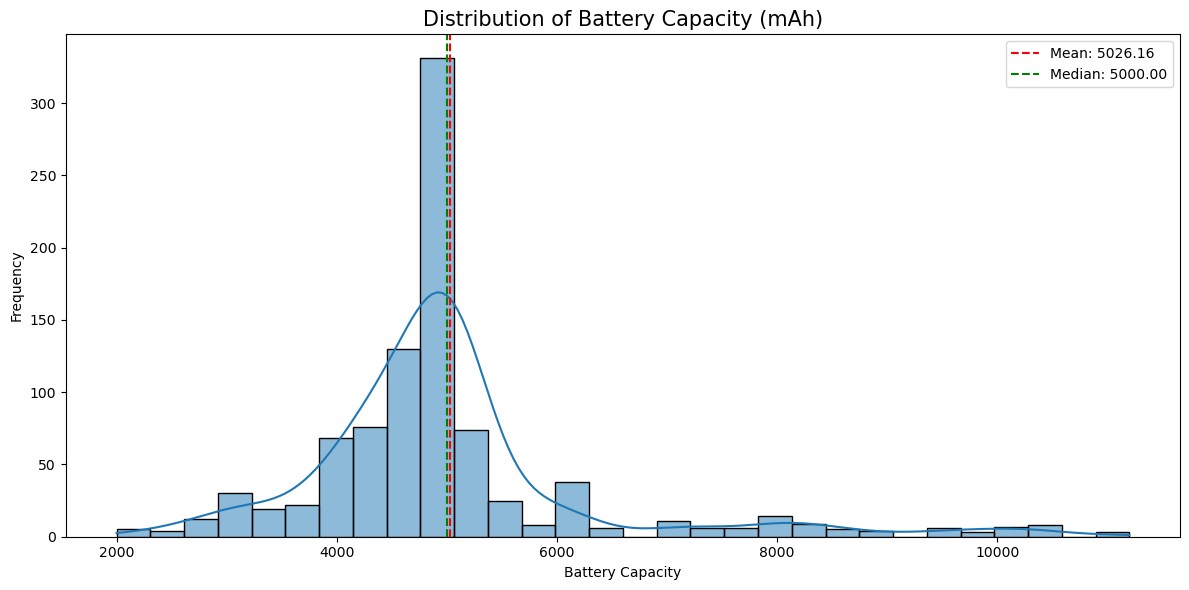

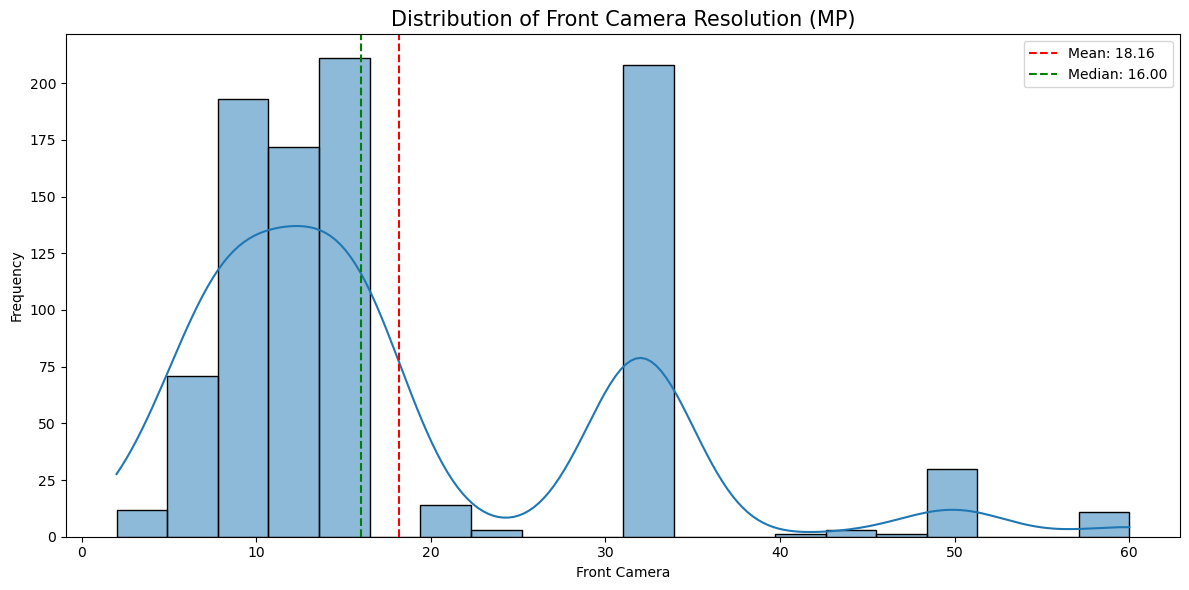

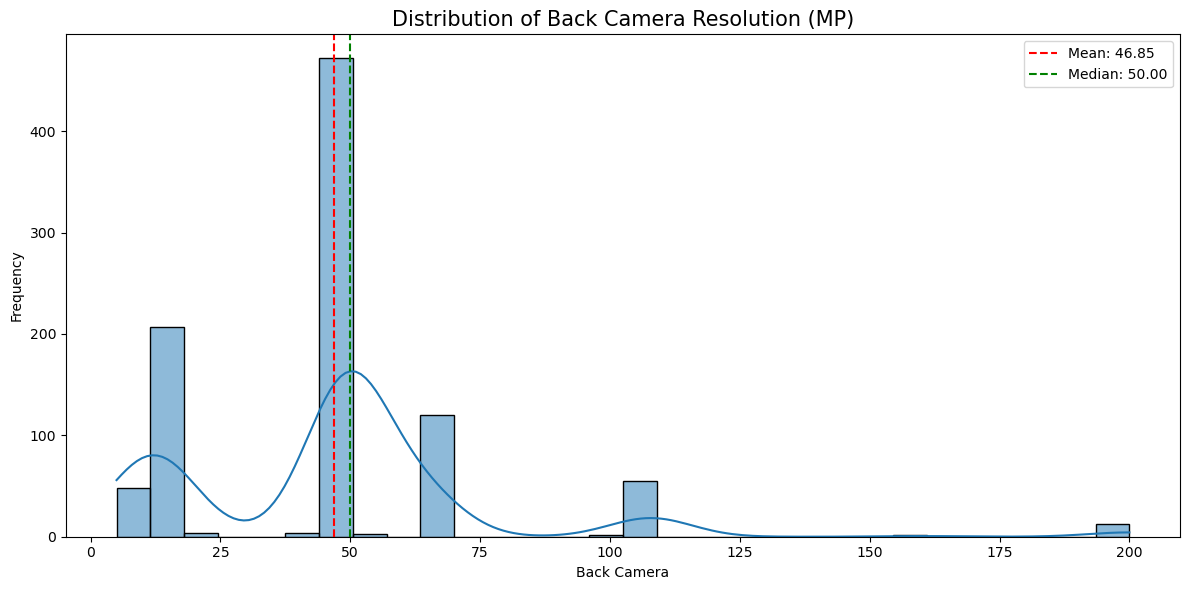

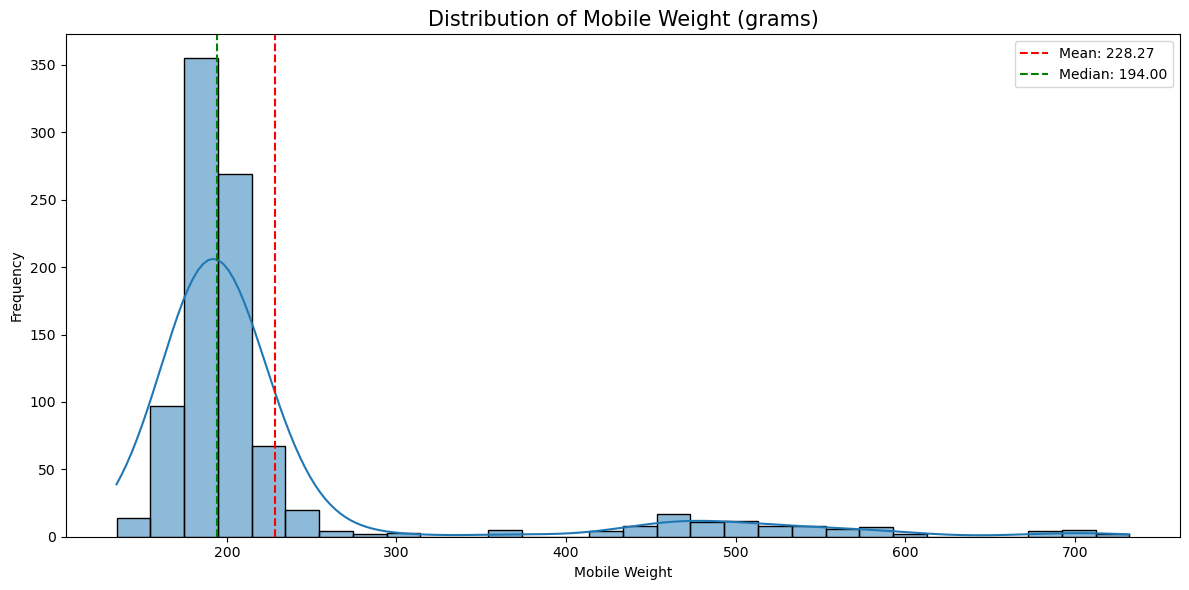

In [53]:
# Creating a function to plot the price distribution of different companies
def plot_feature(df, feature, title, bins=30):
    plt.figure(figsize=(12, 6))
    sns.histplot(df[feature].dropna(), bins=bins, kde=True)
    # Mean and median lines
    mean_val = df[feature].mean()
    plt.axvline(x=mean_val, color='red', linestyle='--', 
                label=f'Mean: {mean_val:.2f}')
    median_val = df[feature].median()
    plt.axvline(x=median_val, color='green', linestyle='--', 
                label=f'Median: {median_val:.2f}')
    
    plt.title(title, fontsize=15)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot key specification distributions
plot_feature(df1, 'RAM', 'Distribution of RAM Size (GB)', bins=20)
plot_feature(df1, 'Battery Capacity', 'Distribution of Battery Capacity (mAh)', bins=30)
plot_feature(df1, 'Front Camera', 'Distribution of Front Camera Resolution (MP)', bins=20)
plot_feature(df1, 'Back Camera', 'Distribution of Back Camera Resolution (MP)', bins=30)
plot_feature(df1, 'Mobile Weight', 'Distribution of Mobile Weight (grams)', bins=30)


### 4.4 Launch Year Analysis

C:\Users\Rahul\AppData\Local\Temp\ipykernel_10768\3032730794.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




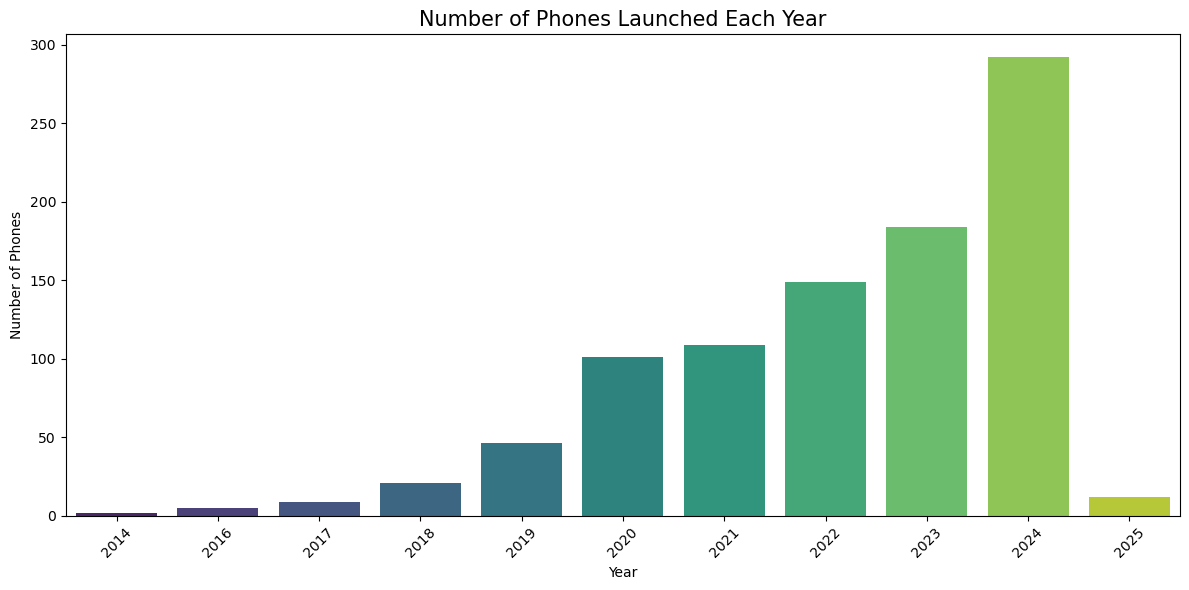

In [54]:
# Plotting a Barplot for the number of phones launched each year
plt.figure(figsize=(12, 6))
launch_year = df1['Launched Year'].value_counts().sort_index()
sns.barplot(x=launch_year.index, y=launch_year.values, palette='viridis')
plt.title('Number of Phones Launched Each Year', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Number of Phones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


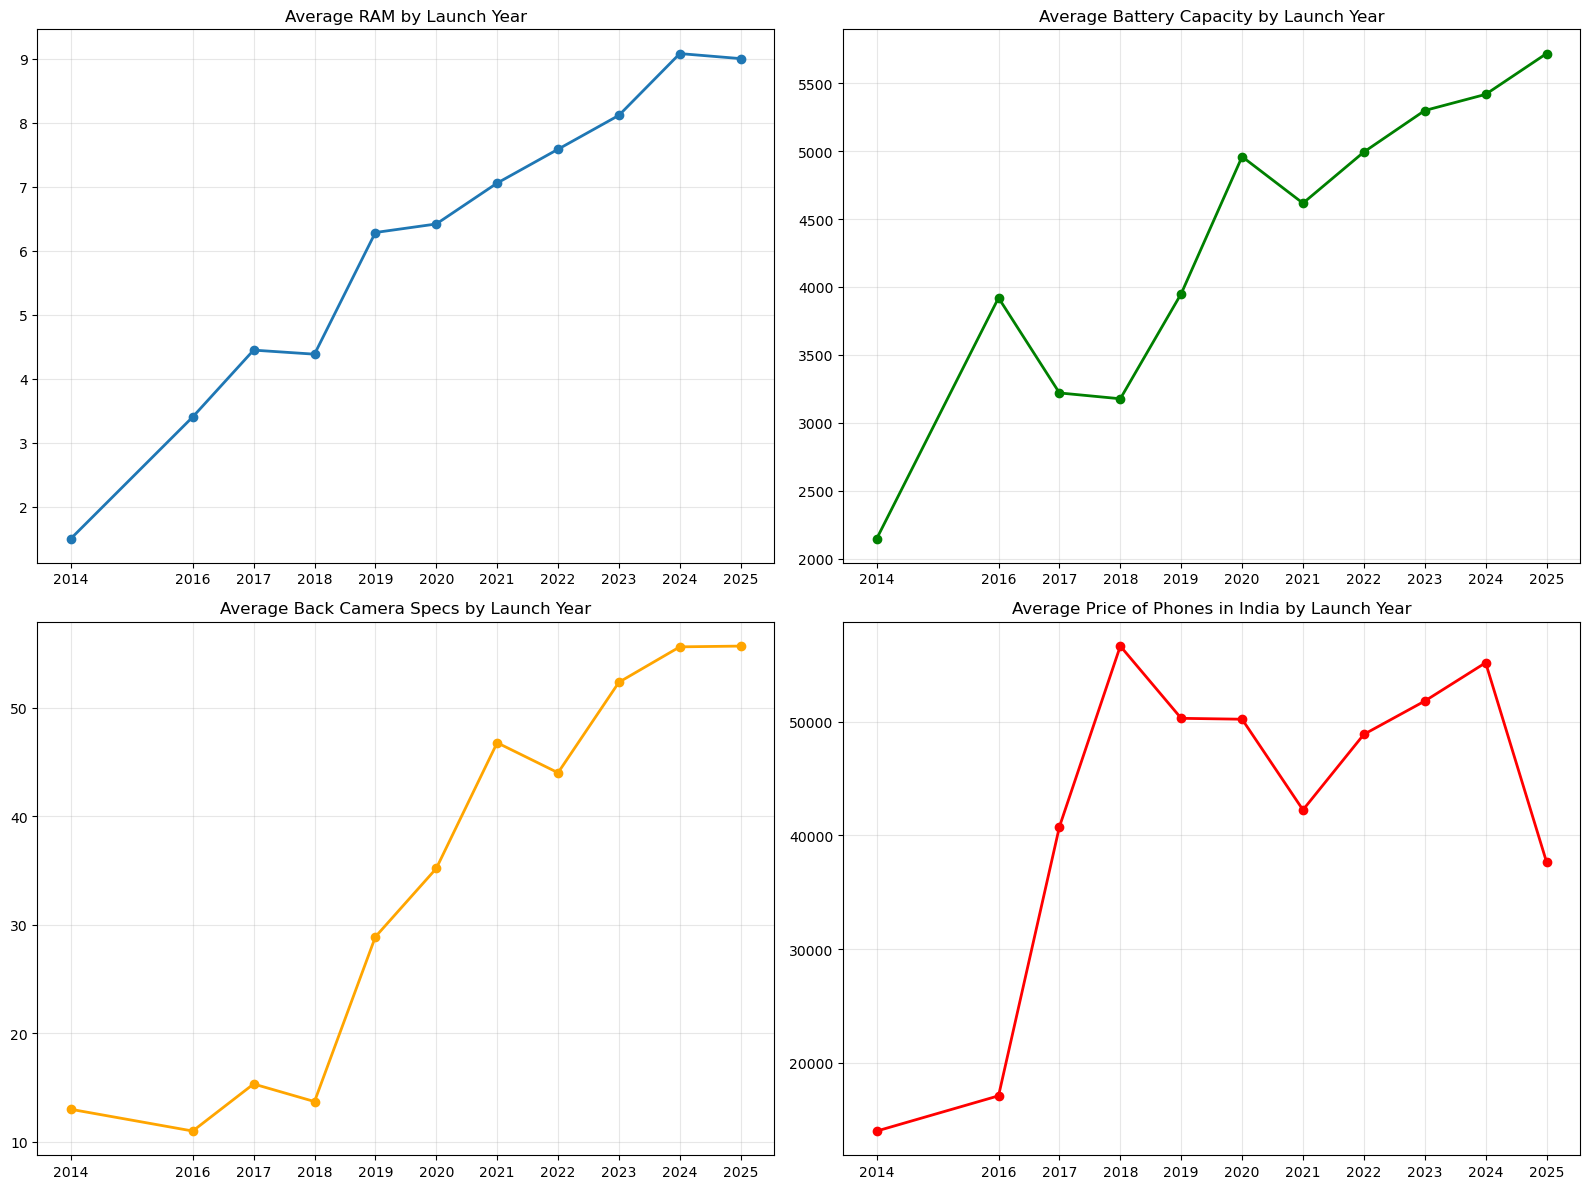

In [55]:
# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# RAM by year
ram_year = df1.groupby('Launched Year')['RAM'].mean()
axes[0, 0].plot(ram_year.index, ram_year.values, marker='o', linewidth=2)
axes[0, 0].set_title('Average RAM by Launch Year')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(ram_year.index)

# Battery by year
battery_capacity = df1.groupby('Launched Year')['Battery Capacity'].mean()
axes[0, 1].plot(battery_capacity.index, battery_capacity.values, marker='o', linewidth=2, color='green')
axes[0, 1].set_title('Average Battery Capacity by Launch Year')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(battery_capacity.index)

# Back camera by year
back_camera_specs = df1.groupby('Launched Year')['Back Camera'].mean()
axes[1, 0].plot(back_camera_specs.index, back_camera_specs.values, marker='o', linewidth=2, color='orange')
axes[1, 0].set_title('Average Back Camera Specs by Launch Year')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(back_camera_specs.index)

# Price by year 
price_year = df1.groupby('Launched Year')['Launched Price (India)'].mean()
axes[1, 1].plot(price_year.index, price_year.values, marker='o', linewidth=2, color='red')
axes[1, 1].set_title('Average Price of Phones in India by Launch Year')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks(price_year.index)

plt.tight_layout()
plt.show()

### 5.1 Price vs. Specifications Relationships

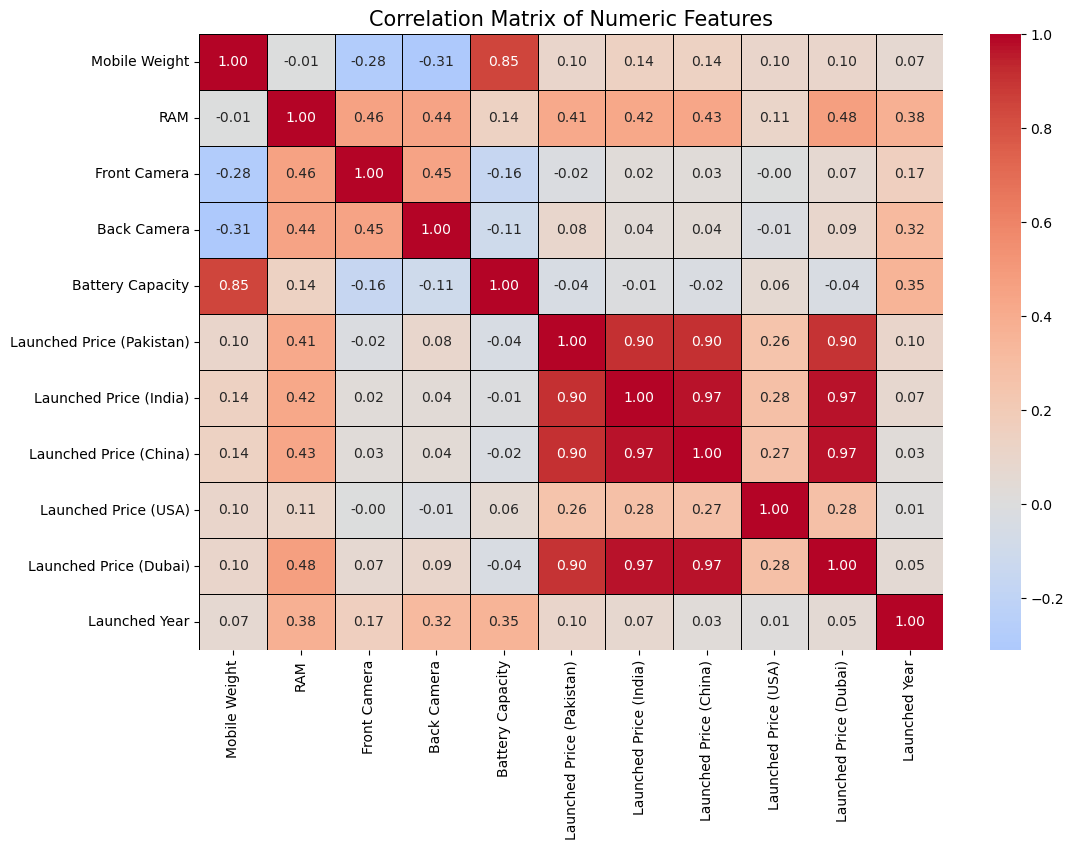

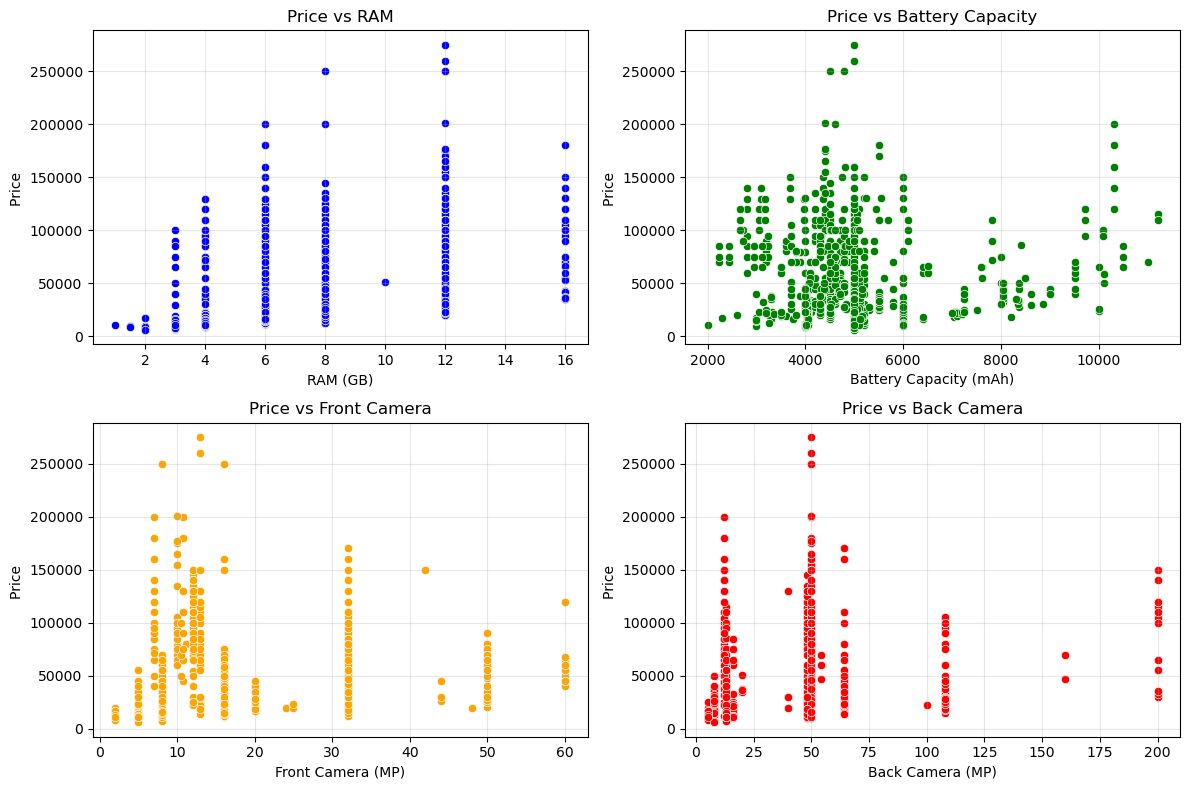

In [56]:
numeric_cols = df1.select_dtypes(include=[np.number]).columns.tolist()
# Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = df1[numeric_cols].corr()
sns.heatmap(corr_matrix,annot= True, fmt =".2f",cmap='coolwarm', center=0, linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Numeric Features', fontsize=15)
plt.show()

# Correlation between Price (india) and other features
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(data=df1, x='RAM', y='Launched Price (India)', color='blue')
plt.title('Price vs RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Price ')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
sns.scatterplot(data=df1, x='Battery Capacity', y='Launched Price (India)', color='green')
plt.title('Price vs Battery Capacity')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Price ')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
sns.scatterplot(data=df1, x='Front Camera', y='Launched Price (India)', color='orange')
plt.title('Price vs Front Camera')
plt.xlabel('Front Camera (MP)')
plt.ylabel('Price ')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
sns.scatterplot(data=df1, x='Back Camera', y='Launched Price (India)', color='red')
plt.title('Price vs Back Camera')
plt.xlabel('Back Camera (MP)')
plt.ylabel('Price ')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



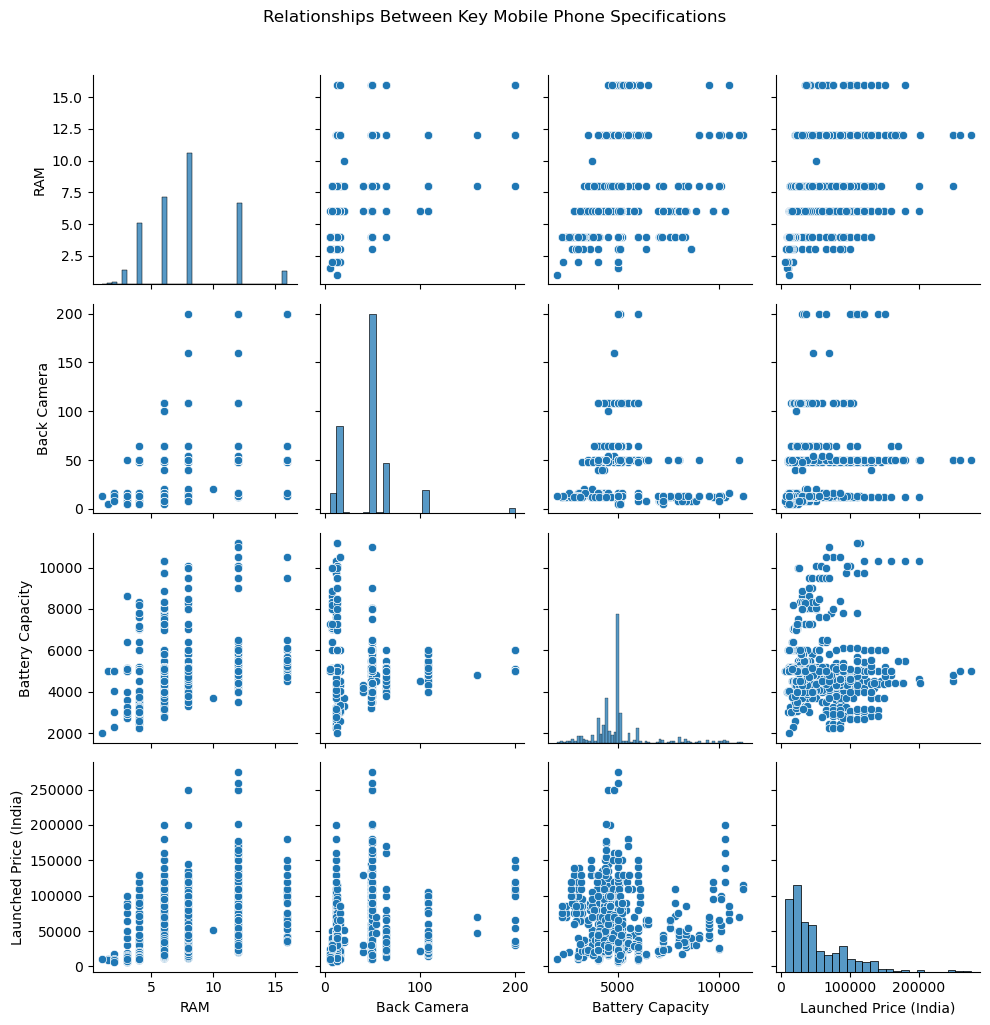

In [57]:
# Correcting the column names to match the actual columns in df1 (Pairplot Construction)
feature_specs = ['RAM', 'Back Camera', 'Battery Capacity', 
                 'Screen Size', 'Launched Price (India)',]
sns.pairplot(df1[feature_specs].dropna())
plt.suptitle('Relationships Between Key Mobile Phone Specifications', y=1.02, fontsize=12)
plt.tight_layout()
plt.show()

### 5.2 Price Analysis by Brand

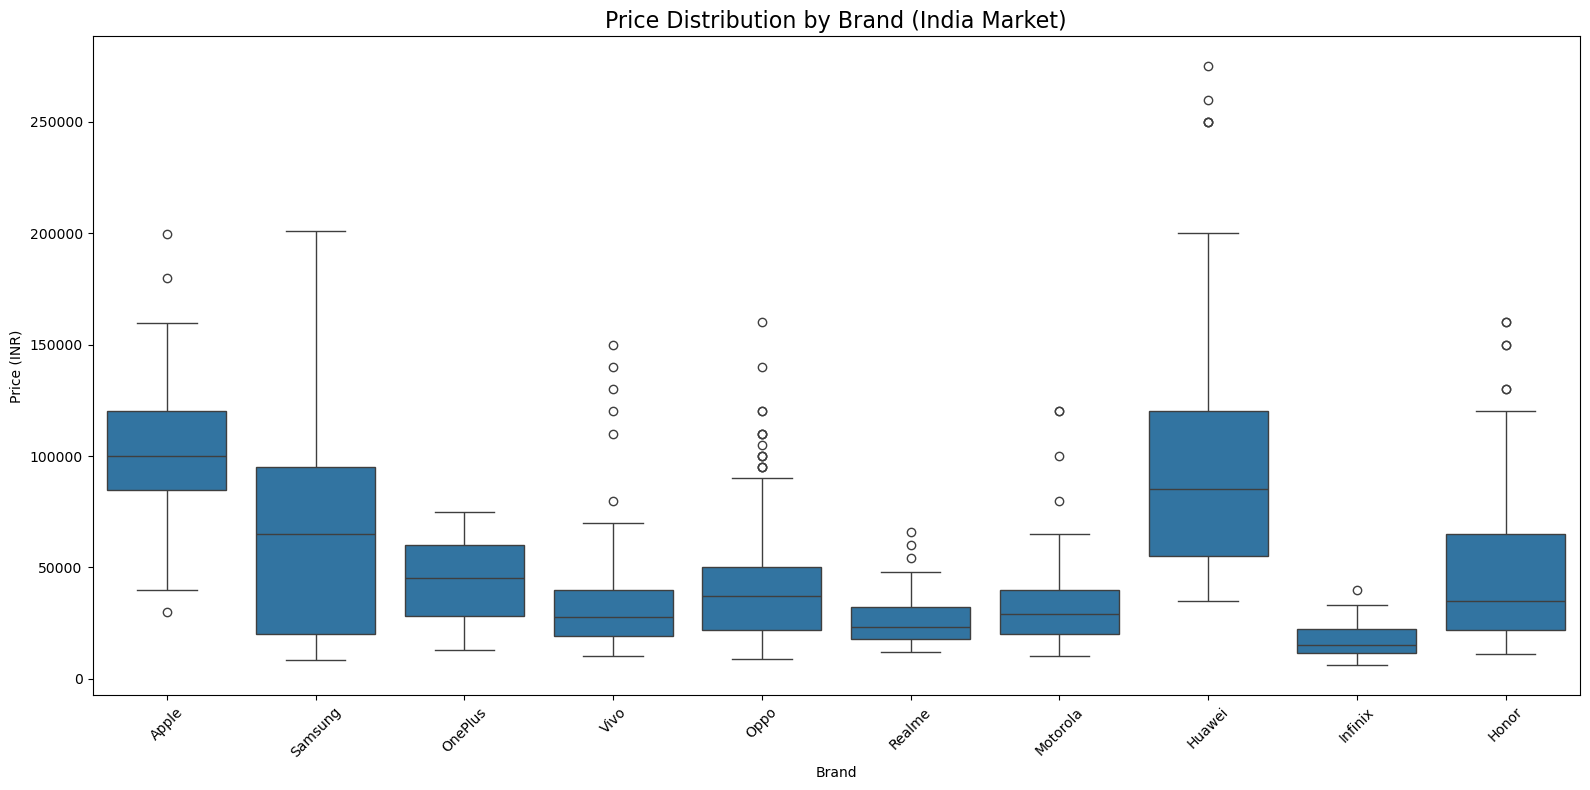

In [58]:
# Boxplot for Price Distribution by Brand
plt.figure(figsize=(16, 8))

top10_Companies = df1['Company'].value_counts().head(10).index
company_data = df1[df1['Company'].isin(top10_Companies)]

# Create box plot
sns.boxplot(x='Company', y='Launched Price (India)', data=company_data)
plt.title('Price Distribution by Brand (India Market)', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Brand')
plt.ylabel('Price (INR)')
plt.tight_layout()
plt.show()

C:\Users\Rahul\AppData\Local\Temp\ipykernel_10768\604418503.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




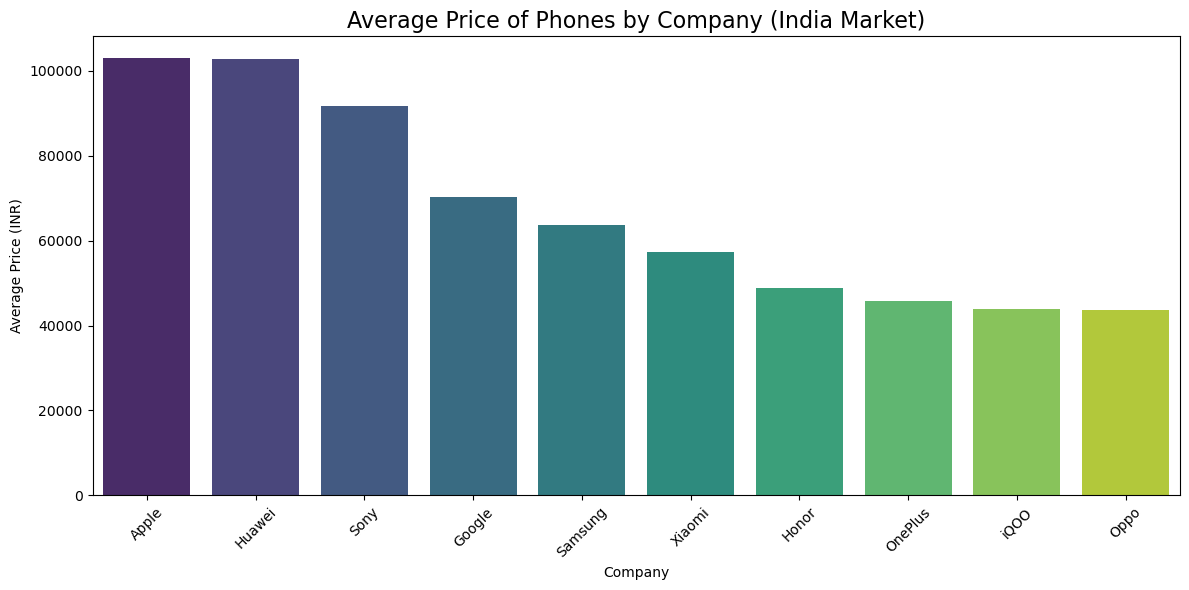

In [59]:
# Calculating the average price for each company
avg_price = df1.groupby('Company')['Launched Price (India)'].mean().sort_values(ascending=False)
top10_avgprice = avg_price.head(10)
top10_avgprice

# Plotting the average price for the top 10 companies
plt.figure(figsize=(12, 6))
sns.barplot(x=top10_avgprice.index, y=top10_avgprice.values, palette='viridis')
plt.title('Average Price of Phones by Company (India Market)', fontsize=16)
plt.xlabel('Company')
plt.ylabel('Average Price (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### 5.3 Specification Comparison by Brand

In [60]:
# Top 5 Brands and comparinfg their specs

top5_brands = df1['Company'].value_counts().head(5).index
brand_specs = pd.DataFrame()

# Plotting a 3d Graph for the Top 5 Brands
fig = px.scatter_3d(
    df1[df1['Company'].isin(top5_brands)],
    x='RAM',
    y='Back Camera',
    z='Battery Capacity',
    color='Company',
    hover_data=['Model Name', 'Screen Size', 'Launched Price (India)'],
    title='Top 5 Brands: 3D Spec Comparison'
)

fig.update_traces(marker=dict(size=5, opacity=0.8), selector=dict(mode='markers'))
fig.update_layout(scene=dict(
    xaxis_title='RAM (GB)',
    yaxis_title='Back Camera (MP)',
    zaxis_title='Battery (mAh)'
))
fig.show()


## 6. Feature Engineering and Advanced Analysis


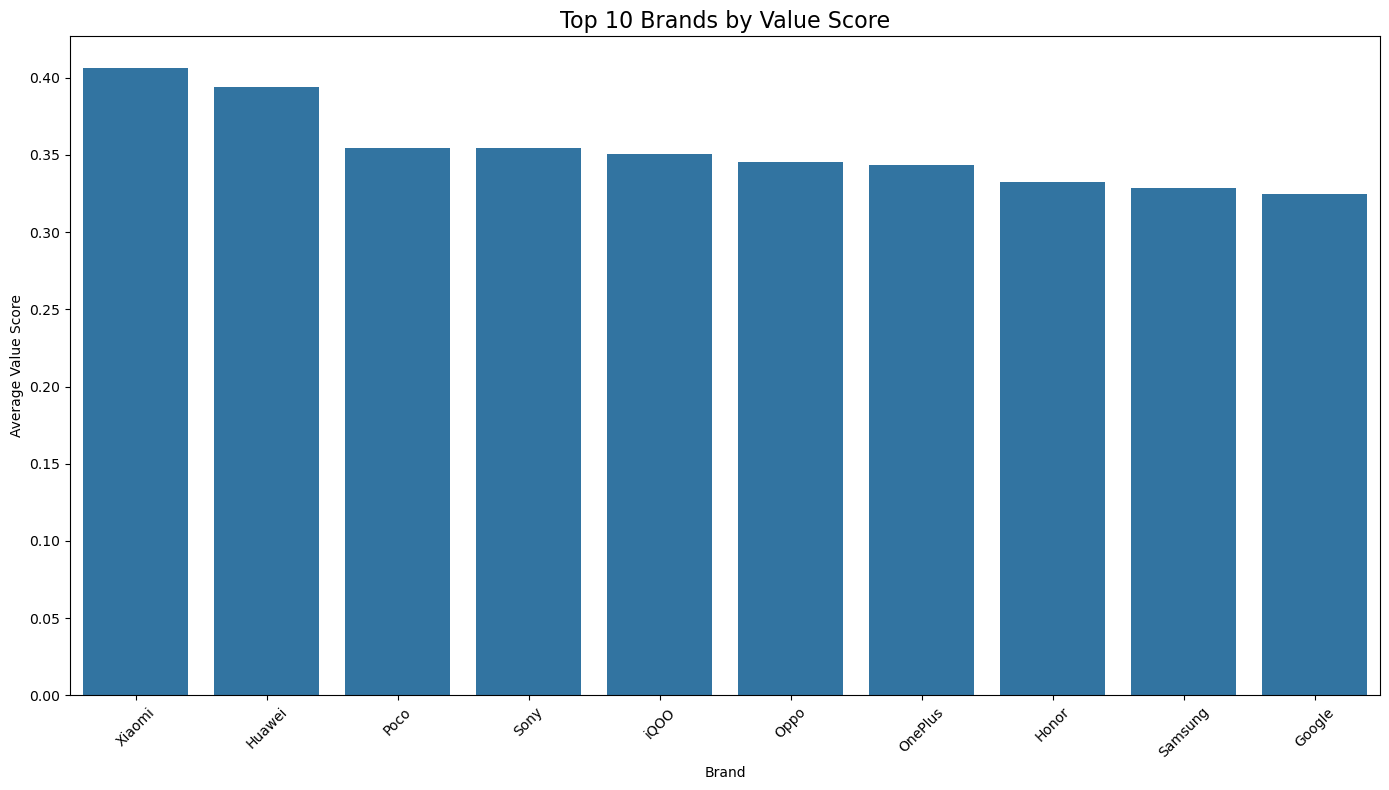

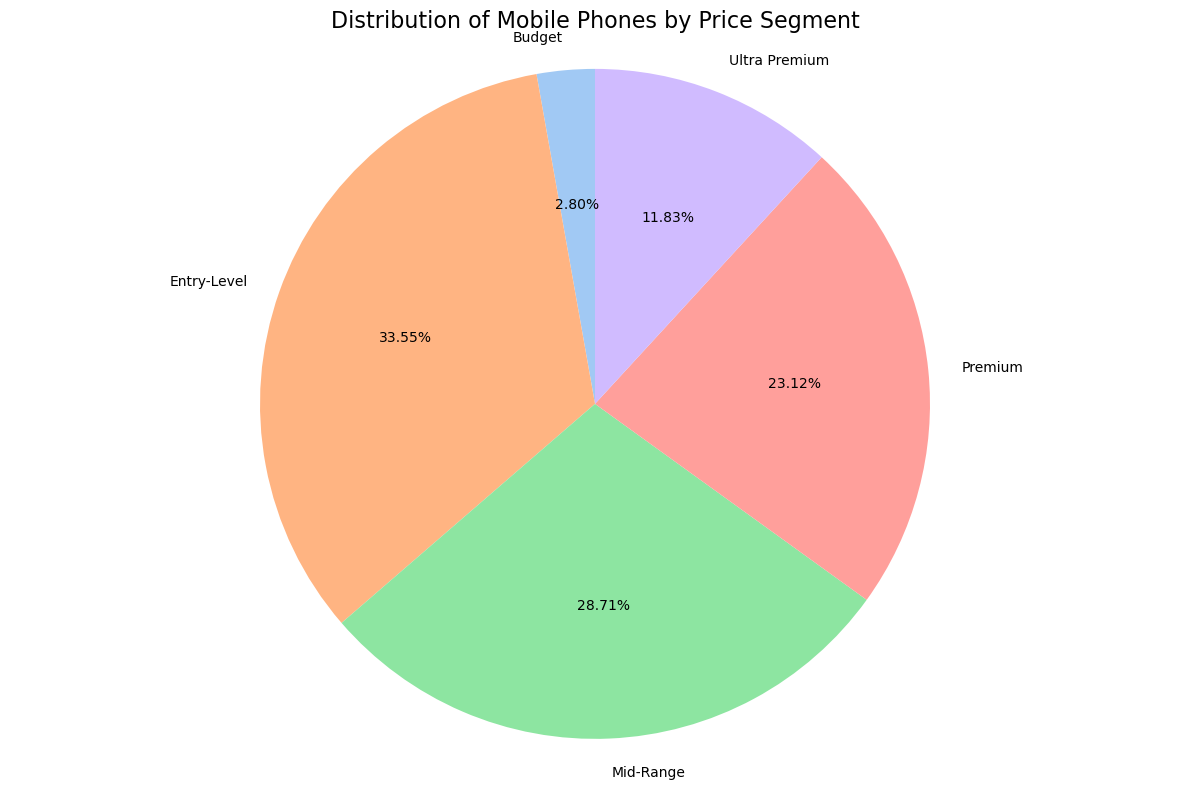

In [61]:
# Creating new features for insights
df1['Price_per_RAM'] = df1['Launched Price (India)'] / df1['RAM']
df1['Price_per_Battery'] = df1['Launched Price (India)'] / df1['Battery Capacity']
df1['Camera_to_Price'] = df1['Back Camera'] / df1['Launched Price (India)'] * 1000  

df1['Price_Segment'] = pd.cut(
    df1['Launched Price (India)'], 
    bins=[0, 10000, 25000, 50000, 100000, float('inf')],
    labels=['Budget', 'Entry-Level', 'Mid-Range', 'Premium', 'Ultra Premium']
)

# Finding the best value phones based on key features
value_score = (
    (df1['RAM'] / df1['RAM'].max()) * 0.3 +
    (df1['Back Camera'] / df1['Back Camera'].max()) * 0.2 +
    (df1['Battery Capacity'] / df1['Battery Capacity'].max()) * 0.2 +
    (df1['Launched Price (India)'] / df1['Launched Price (India)'].max()) * 0.2
)

df1['Value Score'] = value_score

# Plotting the value score by company
plt.figure(figsize=(14, 8))
value_brand = df1.groupby('Company')['Value Score'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=value_brand.index, y=value_brand.values)
plt.title('Top 10 Brands by Value Score', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Brand')
plt.ylabel('Average Value Score')
plt.tight_layout()
plt.show()

# Plottinng price distribution
plt.figure(figsize=(12, 8))
segment_counts = df1['Price_Segment'].value_counts().sort_index()

# Creating pie chart
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.2f%%', 
        startangle=90, shadow=False, colors=sns.color_palette('pastel', len(segment_counts)))
plt.title('Distribution of Mobile Phones by Price Segment', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()


## 7. Market Comparison Analysis

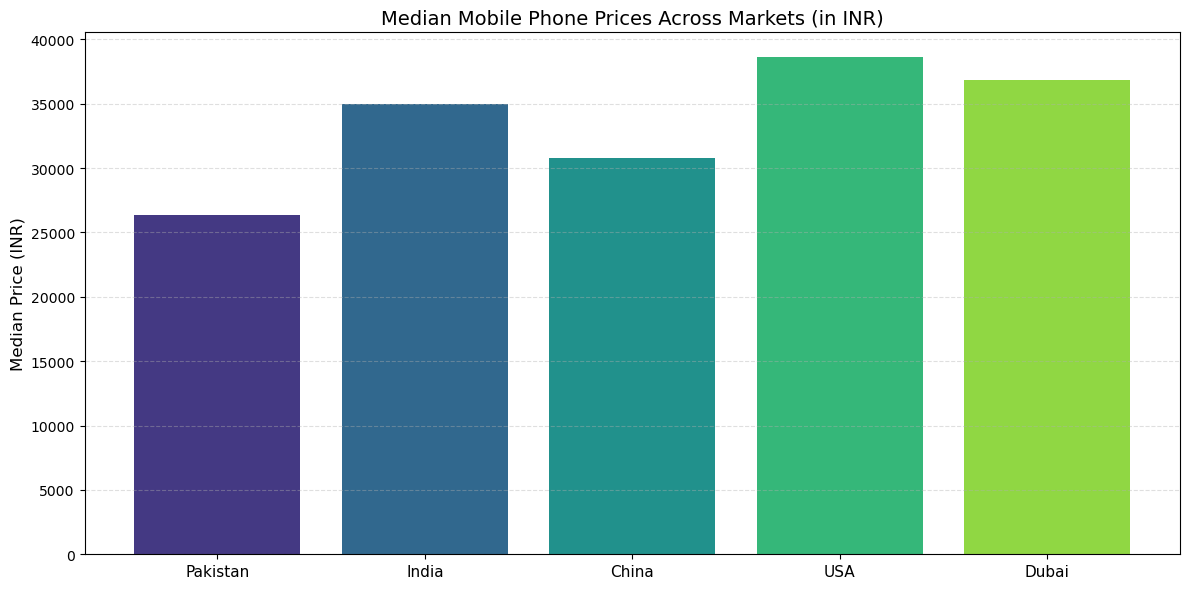

In [62]:
# 1. Price Distribution by Market
# We will take the median price for each market country

countries1 = ['Pakistan', 'India', 'China', 'USA', 'Dubai']
median_prices = [df1[f'Launched Price ({country})'].median() for country in countries1]

# Plotting a bar graph for median prices
plt.figure(figsize=(12, 6))
bars = plt.bar(countries1, median_prices, color=sns.color_palette('viridis', len(countries1)))

plt.title('Median Mobile Phone Prices Across Markets (in INR)', fontsize=14)
plt.ylabel('Median Price (INR)', fontsize=12)
plt.xticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

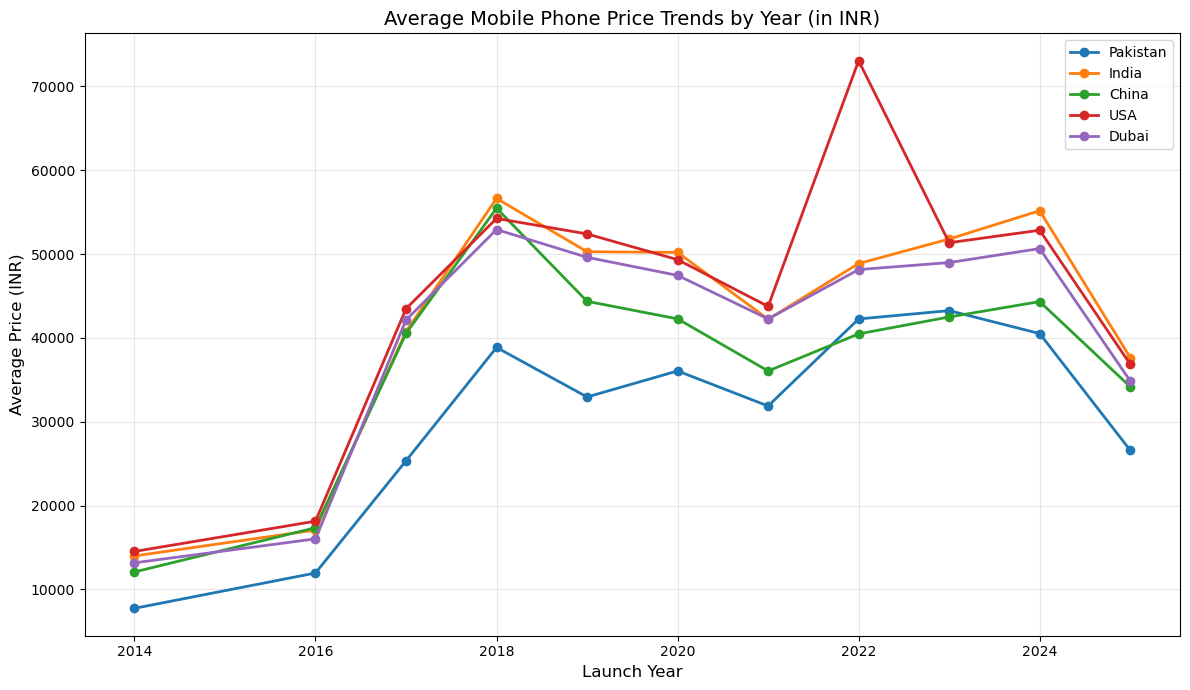

In [63]:
# 2. Year-wise Price of Countries

plt.figure(figsize=(12, 7))

# Plotting the average price for each country by year
for market in countries1:
    price = f'Launched Price ({market})'
    
    yearly_avg = df1.groupby('Launched Year')[price].mean().dropna()
    
    
    if len(yearly_avg) > 1:
        plt.plot(yearly_avg.index, yearly_avg.values, marker='o', linewidth=2, label=market)

plt.title('Average Mobile Phone Price Trends by Year (in INR)', fontsize=14)
plt.xlabel('Launch Year', fontsize=12)
plt.ylabel('Average Price (INR)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

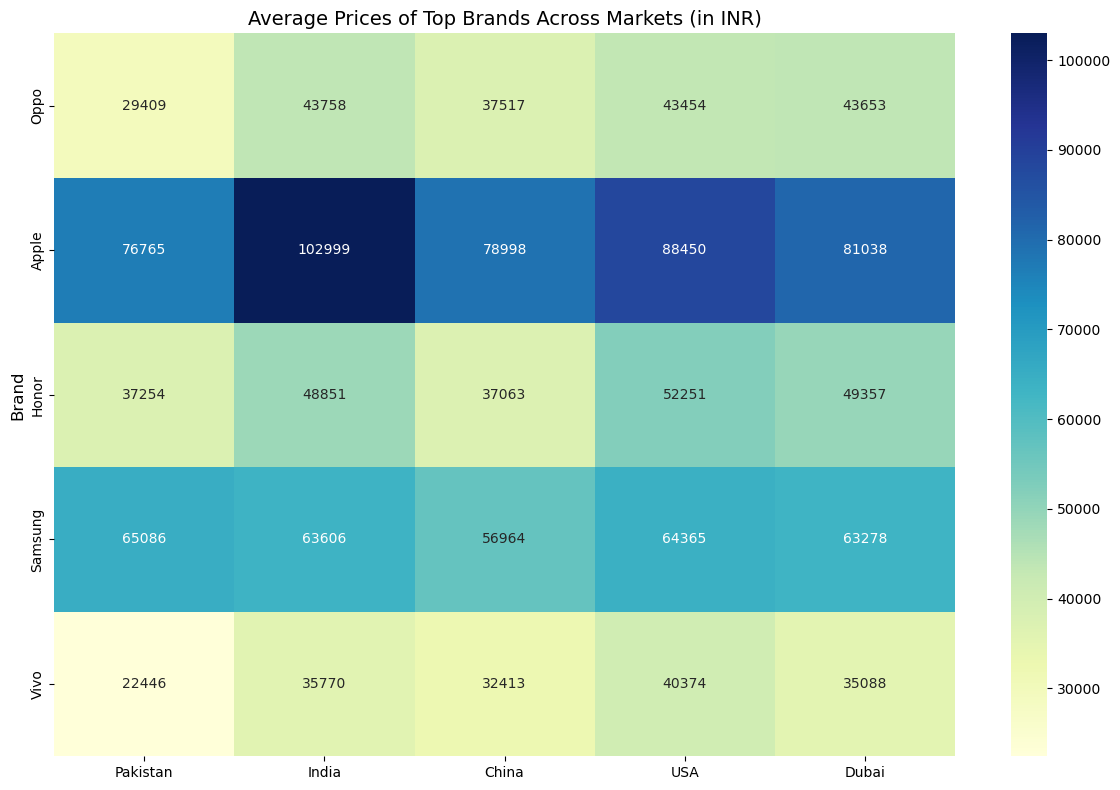

In [64]:
# Get top 5 brands by frequency
top_brands = df1['Company'].value_counts().head(5).index.tolist()

# Calculate average price by brand and market
brand_prices = pd.DataFrame(index=top_brands)

for market in countries1:
    price_col = f'Launched Price ({market})'
    avg_prices = []
    
    for brand in top_brands:
        brand_data = df1[df1['Company'] == brand]
        avg_price = brand_data[price_col].mean()
        avg_prices.append(avg_price)
    
    brand_prices[market] = avg_prices

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(brand_prices, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Average Prices of Top Brands Across Markets (in INR)', fontsize=14)
plt.ylabel('Brand', fontsize=12)
plt.tight_layout()
plt.show()

## 8. Conclusion: Mobile Phone Market Analysis

## 📌 Conclusion

This exploratory data analysis offered valuable insights into the smartphone market landscape of 2025. By systematically analyzing key features, we identified the specifications that most significantly influence a mobile phone’s price and performance perception. Here are the key takeaways:

- 📱 **Specifications like RAM, internal storage, battery capacity, and display size** show strong positive correlation with price, indicating that consumers and manufacturers alike consider these as premium-defining features.
- 📸 **Camera quality and processor performance** are critical differentiators in the mid-to-premium segment, with high-scoring devices clustering around these variables.
- 📊 The analysis also revealed that **5G support and AMOLED displays** are strongly associated with higher-priced models, suggesting these features are now seen as essential in the upper market tier.
- 🔋 Interestingly, a trade-off exists between **camera resolution and battery size** in some price segments, which might reflect product segmentation strategies targeting specific user needs (e.g., content creators vs. gamers).
- 🏷️ Some brands consistently deliver **higher value for money**, packing more features at lower prices—an indicator of competitive pricing or efficiency in design and manufacturing.

This analysis not only highlights key technical and market trends but also sets the stage for further work in **predictive modeling**, **clustering**, or even building **recommendation systems** based on user preferences and price constraints.

---

